In [2]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

# data_path = r"C:\Users\LIUH0\Documents\mfe courses\quarter3\MachineLearning431\hw1\StockRetAcct_insample.dta"
data_path = r"C:\workspace\ext\cygwin\home\2013956\personal\machine_learning\hw1\StockRetAcct_insample.dta"
df = pd.read_stata(data_path)
df["ExRet"] = np.exp(df["lnAnnRet"]) - np.exp(df["lnRf"])
dl = pl.from_dataframe(df)
dl 

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64
6.0,1980,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,0.093626,0.696001,0.095294,0.084134,0.633391,3.0,0.3564
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097
6.0,1982,0.18663,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,0.111663,0.730972,0.079516,0.062072,0.779405,3.0,0.065553
6.0,1983,0.489819,0.08983,0.00017,-0.07178,0.046218,12.561954,0.165531,0.115924,-0.033117,0.710885,0.055374,0.076955,0.702113,3.0,0.538032
10.0,1991,-0.508005,0.061216,0.000033,0.115204,1.341053,11.565831,0.239788,0.023147,0.300051,0.418764,0.146828,0.374368,-2.160942,10.0,-0.461433
12.0,2000,-1.356847,0.061977,0.000012,0.165238,0.251746,12.275754,-0.382327,-0.023783,-0.174606,0.824471,-0.591773,1.067196,-3.815523,6.0,-0.806467
15.0,1986,0.453034,0.062209,0.000136,null,null,12.740419,0.219266,null,null,0.779327,0.118562,null,null,3.0,0.508892
15.0,1987,-0.049553,0.066003,0.000183,null,0.337218,13.172914,0.219979,0.104938,0.046007,0.522232,0.127679,0.05877,-0.362636,3.0,-0.116576
15.0,1988,0.141739,0.072406,0.000193,0.160109,0.10825,13.123762,0.239861,0.119085,0.120877,0.541653,0.134526,0.142907,-0.228204,12.0,0.077184


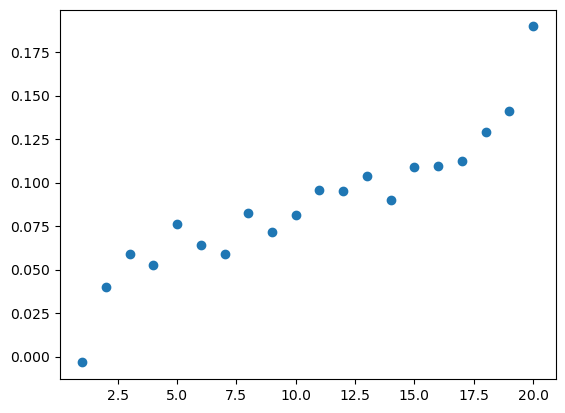

In [3]:
ew_bm_mutualfunds = dl.drop_nulls("lnBM").with_columns(pl.col("lnBM").qcut(20, labels=[str(i) for i in range(1, 21)]).alias("qcut")).select(pl.col("ExRet"), pl.col("qcut").cast(pl.Utf8).cast(pl.Int16)).group_by("qcut").mean().sort("qcut")
ew_bm_mutualfunds
plt.scatter(ew_bm_mutualfunds.get_column("qcut").to_numpy(), ew_bm_mutualfunds.get_column("ExRet").to_numpy())
plt.show()

In [4]:
result_dl = None
for i in range(1981, 2015):
    temp_dl = dl.filter(pl.col("year") == i).drop_nulls("lnBM").with_columns(pl.col("lnBM").qcut(20, labels=[str(i) for i in range(1, 21)]).alias("qcut"))
    temp_dl = temp_dl.cast({"qcut": pl.Utf8})
    if result_dl is None:
        result_dl = temp_dl
    else:
        result_dl = pl.concat([result_dl, temp_dl])
result_dl

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet,qcut
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64,str
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097,"""17"""
50.0,1981,-0.362215,0.130199,0.000093,-0.037263,0.339044,11.667311,0.243628,0.146766,0.183164,0.79037,0.147756,0.150796,0.084959,3.0,-0.442922,"""14"""
120.0,1981,0.37296,0.130199,0.00054,0.300219,0.036303,13.427506,0.193899,0.200025,0.071841,0.970597,0.106679,0.044003,0.708901,8.0,0.312971,"""20"""
128.0,1981,-0.519226,0.130199,0.00144,0.168267,0.139604,14.407578,0.461742,0.149542,0.075114,0.831918,0.152359,0.085585,0.139065,4.0,-0.544074,"""15"""
135.0,1981,-0.768397,0.130199,0.000272,0.040192,0.104784,12.740149,0.20317,0.101146,0.024861,0.766497,0.066962,0.058133,0.795631,3.0,-0.675299,"""20"""
143.0,1981,-0.924644,0.130199,0.002769,0.243197,0.223243,15.061482,0.235058,0.168626,0.292767,0.769143,0.200616,0.126681,-0.303511,12.0,-0.742383,"""10"""
199.0,1981,0.076814,0.130199,0.001824,0.032098,0.061914,14.643783,0.288466,0.176307,0.07864,0.776593,0.233056,0.037514,-0.178874,1.0,-0.059214,"""11"""
206.0,1981,0.279154,0.130199,0.000686,0.046836,0.157236,13.665726,0.296064,0.176503,0.101794,0.481521,0.173882,0.083304,0.061986,7.0,0.182956,"""14"""
214.0,1981,-0.233593,0.130199,0.000617,-0.028694,0.437863,13.559172,0.140418,0.136242,0.050734,0.844184,0.069905,0.056126,0.487077,3.0,-0.347371,"""18"""


In [8]:
dl_vingtile_yr 

year,qcut,ExRet
i16,str,f64
1985,"""6""",0.208222
1985,"""9""",0.348325
1987,"""14""",-0.078326
1993,"""15""",0.002077
1997,"""15""",0.166752
1981,"""12""",-0.267841
2001,"""4""",-0.219454
2002,"""15""",-0.047372
2005,"""17""",0.086473


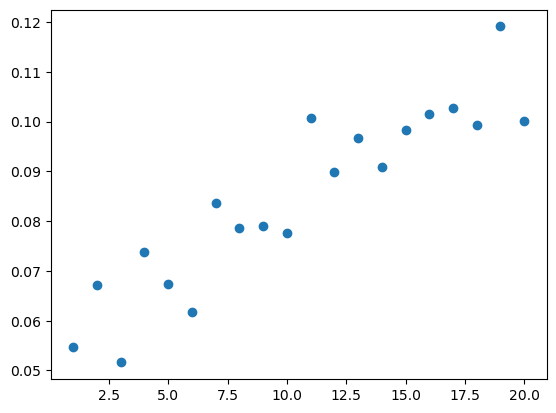

In [5]:
dl_vingtile_yr = result_dl.group_by(by=["year", "qcut"]).agg(pl.col("ExRet").mean())
dl_vingtile_yr
ew_bm_mutualfunds_yr = dl_vingtile_yr.group_by("qcut").agg(pl.col("ExRet").mean()).cast({"qcut": pl.Int16}).sort("qcut")

ew_bm_mutualfunds_yr
# import matplotlib.pyplot as plt
plt.scatter(ew_bm_mutualfunds_yr.get_column("qcut").to_numpy(), ew_bm_mutualfunds_yr.get_column("ExRet").to_numpy())
plt.show()

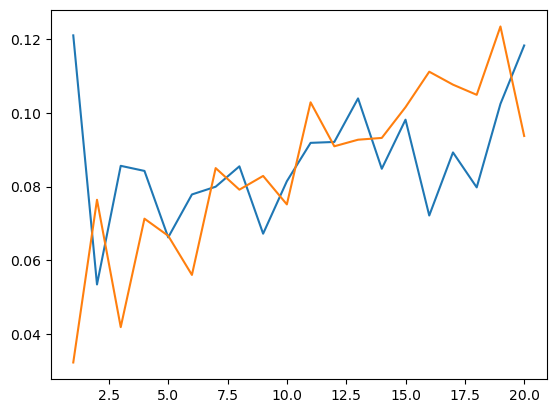

In [15]:
result_dl = result_dl.with_columns((-pl.col("lnME")).rank("ordinal").over("year").alias("rank"))
result_dl = result_dl.with_columns((pl.col("rank") < 501).alias("LargeStock"))
# result_dl
ew_bm_mutualfunds_yr_large = result_dl.filter(pl.col("LargeStock") == True).group_by(["qcut", "year"]).agg(pl.col("ExRet").mean())
ew_bm_mutualfunds_yr_small = result_dl.filter(pl.col("LargeStock") == False).group_by(["qcut", "year"]).agg(pl.col("ExRet").mean())
ew_bm_mutualfunds_yr_large = ew_bm_mutualfunds_yr_large.group_by("qcut").agg(pl.col("ExRet").mean()).cast({"qcut": pl.Int16}).sort("qcut")
ew_bm_mutualfunds_yr_small = ew_bm_mutualfunds_yr_small.group_by("qcut").agg(pl.col("ExRet").mean()).cast({"qcut": pl.Int16}).sort("qcut")
ew_bm_mutualfunds_yr_small

plt.plot(ew_bm_mutualfunds_yr_large.get_column("qcut").to_numpy(), ew_bm_mutualfunds_yr_large.get_column("ExRet").to_numpy())
plt.plot(ew_bm_mutualfunds_yr_small.get_column("qcut").to_numpy(), ew_bm_mutualfunds_yr_small.get_column("ExRet").to_numpy())
plt.show()

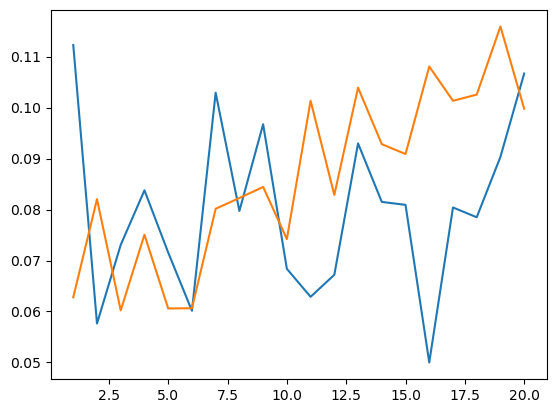

In [25]:
vw_bm_mutualfunds_yr_large = result_dl.filter(pl.col("LargeStock") == True).group_by(["qcut", "year"]).agg((pl.col("ExRet") * pl.col("MEwt")).sum() / pl.sum("MEwt"))
vw_bm_mutualfunds_yr_small = result_dl.filter(pl.col("LargeStock") == False).group_by(["qcut", "year"]).agg((pl.col("ExRet") * pl.col("MEwt")).sum() / pl.sum("MEwt"))
vw_bm_mutualfunds_yr_large = vw_bm_mutualfunds_yr_large.group_by("qcut").agg(pl.col("ExRet").mean()).cast({"qcut": pl.Int16}).sort("qcut")
vw_bm_mutualfunds_yr_small = vw_bm_mutualfunds_yr_small.group_by("qcut").agg(pl.col("ExRet").mean()).cast({"qcut": pl.Int16}).sort("qcut")
vw_bm_mutualfunds_yr_small 
plt.plot(vw_bm_mutualfunds_yr_large.get_column("qcut").to_numpy(), vw_bm_mutualfunds_yr_large.get_column("ExRet").to_numpy())
plt.plot(vw_bm_mutualfunds_yr_small.get_column("qcut").to_numpy(), vw_bm_mutualfunds_yr_small.get_column("ExRet").to_numpy())
plt.show()

In [ ]:
# dl = dl.with_columns((np.exp(pl.col("lnAnnRet")) - np.exp(pl.col("lnRf"))).alias("ExRet"))
dl.columns
dl.select(["lnRf", "lnProf"]).to_numpy()

In [ ]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

start_year = 1980
end_year = 2014
length = end_year - start_year + 1
port_return = np.empty([length, 13])
exdog = ["lnBM", "lnProf", "ff_ind"]

for i in range(start_year, end_year + 1):
    # x = dl.filter(pl.col("year") == i).select(exdog).to_numpy()
    # y = dl.filter(pl.col("year") == i).get_column("ExRet").to_numpy()
    # model = sm.OLS(y, sm.add_constant(x), missing="drop")
    model = smf.ols("ExRet ~ lnBM + lnProf + C(ff_ind)", df.loc[df["year"] == i, ["lnBM", "lnProf", "ExRet", "ff_ind"]])
    result = model.fit()
    params = result.params
    port_return[i - start_year] = params[1:]

port_return

In [ ]:
result_dict = {}
result_dict["mean"] = port_return.mean(axis=0)
result_dict["std"] = port_return.std(axis=0)
result_dict["sharpe"] = result_dict["mean"] / result_dict["std"]
result_dict["tstats"] = np.sqrt(length) * result_dict["sharpe"]
print(result_dict)

In [ ]:
dl 

In [ ]:
last_date = dl.filter(pl.col("year") == 2014).drop_nulls(["lnProf", "lnBM", "ff_ind"]).with_columns(intercept=1).cast({"ff_ind": pl.Int16}).to_dummies("ff_ind")
last_date
columns = ["intercept", "lnProf", "lnBM"] + [f"ff_ind_{i}" for i in range(1, 12)]
columns
xmat = last_date.select(columns).to_numpy()
xmat
portweights_lnBM = np.matmul(np.matmul(xmat.T, xmat), xmat.T)[2, :]
portweights_lnBM = portweights_lnBM * 0.15 / result_dict["std"][-1]
portweights_lnBM

In [ ]:
import matplotlib.pyplot as plt 

lnBM_ret = port_return[:, -2] * 0.15 / result_dict["std"][-2]
cum_ret_lnBM = np.empty(length)
cum_ret_lnBM[0] = np.log(lnBM_ret[0] + 1) 
for i in range(1, length):
    cum_ret_lnBM[i] = cum_ret_lnBM[i - 1] + np.log(1 + lnBM_ret[i])

print(cum_ret_lnBM)
old_port_ret = np.empty(length)
for i in range(start_year, end_year + 1):
    x = sm.add_constant(dl.filter(pl.col("year") == i).get_column("lnBM").to_numpy())
    y = dl.filter(pl.col("year") == i).get_column("ExRet").to_numpy()
    model = sm.OLS(y, x, missing="drop")
    result = model.fit()
    old_port_ret[i - start_year] = result.params[1]

lnBM_old_ret = old_port_ret * 0.15 / np.std(old_port_ret)
cum_ret_oldlnBM = np.empty(length)
cum_ret_oldlnBM[0] = np.log(1 + lnBM_old_ret[0])
for i in range(1, length):
    cum_ret_oldlnBM[i] = cum_ret_oldlnBM[i - 1] + np.log(1 + lnBM_old_ret[i])

plt.plot(range(start_year, end_year + 1), np.exp(cum_ret_lnBM))
plt.plot(range(start_year, end_year + 1), np.exp(cum_ret_oldlnBM))
plt.show()

In [ ]:
df_lead_roe = dl.set_sorted(["FirmID", "year"]).with_columns((pl.col("lnROE").shift(-1).over("FirmID")).alias("lead_lnROE")).drop_nulls(["lnROE", "lead_lnROE"]).to_pandas()
model = smf.ols("lead_lnROE ~ lnROE", df_lead_roe)
result = model.fit()
result.summary()

In [ ]:
roe_panel2 = smf.ols("lead_lnROE ~ lnROE", df_lead_roe)
result2 = roe_panel2.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe[["FirmID"]]})
result2.summary()

In [ ]:
roe_panel3 = smf.ols("lead_lnROE ~ lnROE", df_lead_roe)
result3 = roe_panel3.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe[["FirmID", "year"]]})
result3.summary()

In [ ]:
df_lead_roe_dummy = dl.set_sorted(["FirmID", "year"]).with_columns((pl.col("lnROE").shift(-1).over("FirmID")).alias("lead_lnROE"), intercept = 1).drop_nulls(["lnROE", "lead_lnROE", "ff_ind"]).cast({"ff_ind": pl.Int16}).to_dummies("ff_ind").to_pandas()

In [ ]:
df_lead_roe_dummy
dl 

In [ ]:
ff_ind = "+".join([f"ff_ind_{i}" for i in range(1, 12)])
regressors = "lead_lnROE ~ lnROE + " + ff_ind
print(regressors)
roe_panel4 = smf.ols(regressors, df_lead_roe_dummy)
result4 = roe_panel4.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe_dummy[["FirmID", "year"]]})
result4.summary()

In [ ]:
# pd.get_dummies(df_lead_roe_dummy["year"], prefix="year_").astype(int)
df_lead_roe_dummy1 = pd.concat([df_lead_roe_dummy, pd.get_dummies(df_lead_roe_dummy["year"], prefix="year").astype(int)], axis=1)
df_lead_roe_dummy1

In [ ]:
# df_lead_roe_dummy1 = pd.get_dummies(df_lead_roe_dummy, columns=["year"])
year_columns = [f"year_{i}" for i in range(start_year + 1, end_year)]
# df_lead_roe_dummy1[year_columns] = df_lead_roe_dummy1[year_columns].astype(int)

In [ ]:
regressors1 = "lead_lnROE ~ lnROE + " + ff_ind + "+" + "+".join(year_columns)
print(regressors1)
roe_panel5 = smf.ols(regressors1, df_lead_roe_dummy1)
result5 = roe_panel5.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe_dummy1[["FirmID", "year"]]})
result5.summary()

In [ ]:
df_lead_roe_dummy3 = df_lead_roe_dummy.dropna(subset=["lead_lnROE", "lnROE", "lnBM", "lnProf", "lnLever", "lnIssue", "lnInv"])
regressors2 = "lead_lnROE ~ lnROE + lnBM + lnProf + lnLever + lnIssue + lnInv + " + ff_ind 
print(regressors2)
roe_panel6 = smf.ols(regressors2, df_lead_roe_dummy3)
result6 = roe_panel6.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe_dummy3[["FirmID", "year"]]})
result6.summary()

In [ ]:
df_lead_roe_dummy4 = dl.set_sorted(["FirmID", "year"]).with_columns((pl.col("lnROE").shift(-5).over("FirmID")).alias("lead5_lnROE"), intercept = 1).drop_nulls(["lead5_lnROE", "lnROE", "lnBM", "lnProf", "lnLever", "lnIssue", "lnInv", "ff_ind"]).cast({"ff_ind": pl.Int16}).to_dummies("ff_ind").to_pandas()
regressors3 = "lead5_lnROE ~ lnROE + lnBM + lnProf + lnLever + lnIssue + lnInv + " + ff_ind 
print(regressors3)
roe_panel7 = smf.ols(regressors3, df_lead_roe_dummy4)
result7 = roe_panel7.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe_dummy4[["FirmID", "year"]]})
result7.summary()